In [34]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 1

# Specify each path

In [35]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [36]:
NUM_CLASSES = 9

# Dataset reading

In [37]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [38]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [40]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [41]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_4 (Dropout)             │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 9)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,169 (4.57 KB)

 Trainable params: 1,169 (4.57 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Model checkpoint callback
model_save_path = "model/keypoint_classifier/keypoint_classifier.keras"
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)

# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [43]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [44]:
model.fit(
    X_train,
    y_train,
    epochs=5000,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/41 ━━━━━━━━━━━━━━━━━━━━ 13s 332ms/step - accuracy: 0.0859 - loss: 2.3668
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1023 - loss: 2.2720 - val_accuracy: 0.2309 - val_loss: 2.1175
Epoch 2/1000
 1/41 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1875 - loss: 2.1058
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2157 - loss: 2.1258 - val_accuracy: 0.3096 - val_loss: 2.0103
Epoch 3/1000
 1/41 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2734 - loss: 2.0925
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2588 - loss: 2.0234 - val_accuracy: 0.3452 - val_loss: 1.8665
Epoch 4/1000
 1/41 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2422 - loss: 1.8961
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.ker

In [45]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8817 - loss: 0.4972 


In [46]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [47]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[4.8663232e-01 3.5351146e-02 2.3987158e-03 7.4140199e-02 1.0239310e-01
 4.9668472e-07 2.0244202e-04 2.1788514e-01 8.0996379e-02]
0


# Confusion matrix

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step


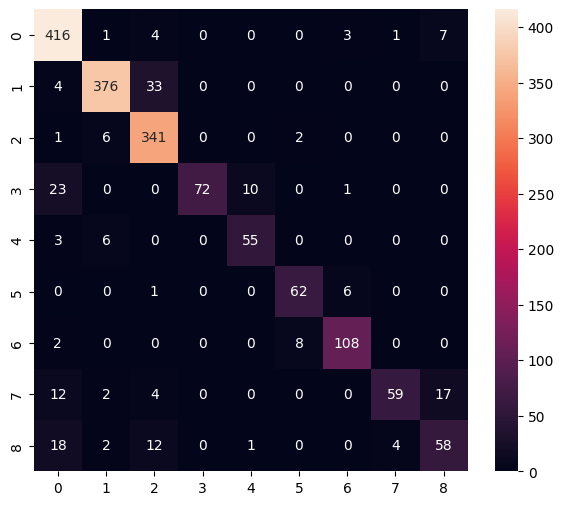

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       432
           1       0.96      0.91      0.93       413
           2       0.86      0.97      0.92       350
           3       1.00      0.68      0.81       106
           4       0.83      0.86      0.85        64
           5       0.86      0.90      0.88        69
           6       0.92      0.92      0.92       118
           7       0.92      0.63      0.75        94
           8       0.71      0.61      0.66        95

    accuracy                           0.89      1741
   macro avg       0.88      0.83      0.85      1741
weighted avg       0.89      0.89      0.89      1741



In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [49]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [50]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/wz/3_gws17s2b5cvmg31b4my9400000gn/T/tmpsx9uopbw/assets


INFO:tensorflow:Assets written to: /var/folders/wz/3_gws17s2b5cvmg31b4my9400000gn/T/tmpsx9uopbw/assets


Saved artifact at '/var/folders/wz/3_gws17s2b5cvmg31b4my9400000gn/T/tmpsx9uopbw'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_2')
Output Type:
  TensorSpec(shape=(None, 9), dtype=tf.float32, name=None)
Captures:
  5418809680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5418802960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5418802192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5418806416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5418802384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5418808912: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1737756564.575924 1071963 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1737756564.575933 1071963 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-01-24 14:09:24.576040: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/wz/3_gws17s2b5cvmg31b4my9400000gn/T/tmpsx9uopbw
2025-01-24 14:09:24.576350: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-01-24 14:09:24.576355: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/wz/3_gws17s2b5cvmg31b4my9400000gn/T/tmpsx9uopbw
2025-01-24 14:09:24.579360: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-01-24 14:09:24.596511: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folders/wz/3_gws17s2b5cvmg31b4my9400000gn/T/tmpsx9uopbw
2025-01-24 14:09:24.602004: I tensorflow/cc/saved_model/loader.cc:

6776

# Inference test

In [51]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [52]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [53]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [54]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 94 µs, sys: 53 µs, total: 147 µs
Wall time: 117 µs


In [55]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[4.8663232e-01 3.5351168e-02 2.3987193e-03 7.4140191e-02 1.0239314e-01
 4.9668523e-07 2.0244223e-04 2.1788514e-01 8.0996372e-02]
0
